### Libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from plotly.subplots import make_subplots
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install imbalanced-learn

In [2]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..','data','03_primary','3.spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

In [3]:
spotify

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.461947,0.920689,0.494433,0.751530,0.050533,0.780650,0.507785,0.669059,0.460989,0.718593,0.301970,acoustic,0,0.311636,1
1,0.387347,0.849624,0.328098,0.994567,0.136151,0.510439,0.346606,0.394881,0.165983,0.268342,0.243282,acoustic,0,0.069720,1
2,0.446450,0.858572,0.244770,0.887294,0.000000,0.541840,0.441962,0.414159,0.358987,0.120603,0.236770,acoustic,0,0.157242,1
3,0.439024,0.913703,0.131397,0.993063,0.309253,0.567599,0.336724,0.229945,0.059581,0.143719,0.830006,acoustic,0,0.015854,1
4,0.436375,0.949954,0.229607,0.945470,0.000000,0.468269,0.442930,0.606940,0.442989,0.167839,0.482246,acoustic,0,0.273774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,0.550216,0.611400,0.171275,0.967978,0.994591,0.476852,0.355576,0.129271,0.234985,0.034070,0.516273,world-music,113,0.040420,0
113795,0.550216,0.622734,0.157759,0.999854,0.998242,0.518733,0.338592,0.131413,0.116982,0.035176,0.286899,world-music,113,0.020358,0
113796,0.490010,0.622734,0.170017,0.989957,0.000000,0.470829,0.423349,0.618721,0.328986,0.746734,0.552197,world-music,113,0.206941,0
113797,0.497723,0.776273,0.078262,0.930424,0.000000,0.720409,0.423444,0.573739,0.505990,0.415075,0.572356,world-music,113,0.297022,1


# Logistic Regresion

## Conjunto Predictores

In [4]:
# Conjuntos predictores

predictors_essential = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'intensity']
predictors_simplified = ['loudness_scaled', 'intensity', 'speechiness_scaled']
predictors_moderate = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'valence_scaled', 'intensity']
predictors_complete = ['danceability_scaled', 'energy_scaled', 'loudness_scaled', 'speechiness_scaled', 'acousticness_scaled', 'instrumentalness_scaled',
                       'liveness_scaled', 'valence_scaled', 'intensity']

predictors_name = ['danceability_scaled', 'energy_scaled','valence_scaled']

## Train Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def entrenar_multiples_modelos_base(X, y):
    """
    Esta función entrena múltiples modelos de clasificación con sus valores predeterminados (modelos base)
    y muestra las métricas de rendimiento para cada modelo, incluyendo la curva ROC y el AUC.

    Parámetros:
    - X: Conjunto de características.
    - y: Conjunto de etiquetas.
    """
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modelos a entrenar
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    }

    # Almacenar resultados para las curvas ROC
    curvas_roc = []

    # Iterar sobre los modelos y entrenar cada uno
    resultados = []
    for nombre_modelo, modelo in modelos.items():
        print(f"\nEntrenando y evaluando: {nombre_modelo}")

        # Entrenar el modelo
        modelo.fit(X_train, y_train)

        # Hacer predicciones
        y_pred = modelo.predict(X_test)

        # Predecir probabilidades para curva ROC (si el modelo lo permite)
        if hasattr(modelo, "predict_proba"):
            y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
        else:
            y_prob = None  # Para modelos sin predict_proba (ej., SVM con kernel lineal)

        # Calcular las métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mtx = confusion_matrix(y_test, y_pred)

        # Calcular la curva ROC y AUC si se pueden obtener probabilidades
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)

            # Almacenar los resultados de la curva ROC
            curvas_roc.append((fpr, tpr, nombre_modelo, auc))

        else:
            auc = 'N/A'

        # Guardar los resultados
        resultados.append({
            'modelo': nombre_modelo,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': confusion_mtx,
            'AUC': auc
        })

        # Mostrar las métricas
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"AUC: {auc}")
        print("Matriz de Confusión:")
        print(confusion_mtx)

    # Graficar todas las curvas ROC al final
    plt.figure()
    for fpr, tpr, nombre_modelo, auc in curvas_roc:
        plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curvas ROC')
    plt.legend(loc="lower right")
    plt.show()

    return resultados


## Models

### predictors_essential


Entrenando y evaluando: Regresión Logística
Accuracy: 0.5572
Precision: 0.5551
Recall: 0.5572
F1 Score: 0.5517
AUC: 0.580821187614114
Matriz de Confusión:
[[7892 4038]
 [6041 4789]]

Entrenando y evaluando: Random Forest
Accuracy: 0.7313
Precision: 0.7320
Recall: 0.7313
F1 Score: 0.7314
AUC: 0.8315587502970156
Matriz de Confusión:
[[8670 3260]
 [2856 7974]]

Entrenando y evaluando: Árbol de Decisión
Accuracy: 0.7024
Precision: 0.7028
Recall: 0.7024
F1 Score: 0.7025
AUC: 0.7007365874650451
Matriz de Confusión:
[[8431 3499]
 [3274 7556]]


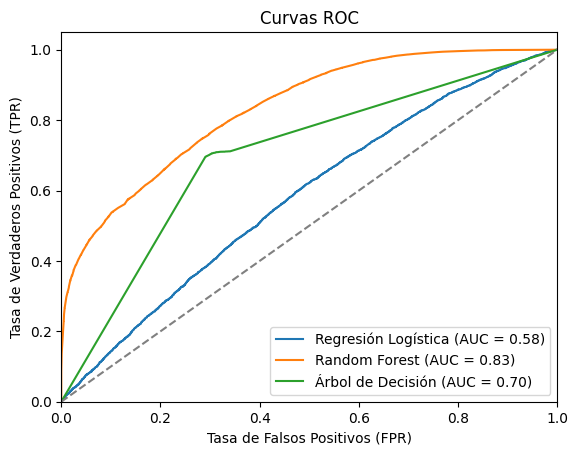

In [6]:
# Ejemplo de uso
# X y y son tus datos (X: características, y: etiquetas)
X = spotify[predictors_essential]  # Tus características
y = spotify['popularity_class']   # Tu etiqueta o variable objetivo

resultados = entrenar_multiples_modelos_base(X, y)

### predictors_simplified


Entrenando y evaluando: Regresión Logística
Accuracy: 0.5482
Precision: 0.5456
Recall: 0.5482
F1 Score: 0.5377
AUC: 0.5581405459207642
Matriz de Confusión:
[[8249 3681]
 [6601 4229]]

Entrenando y evaluando: Random Forest
Accuracy: 0.7081
Precision: 0.7086
Recall: 0.7081
F1 Score: 0.7082
AUC: 0.8098630631592879
Matriz de Confusión:
[[8454 3476]
 [3168 7662]]

Entrenando y evaluando: Árbol de Decisión
Accuracy: 0.6895
Precision: 0.6901
Recall: 0.6895
F1 Score: 0.6896
AUC: 0.686957002954291
Matriz de Confusión:
[[8237 3693]
 [3374 7456]]


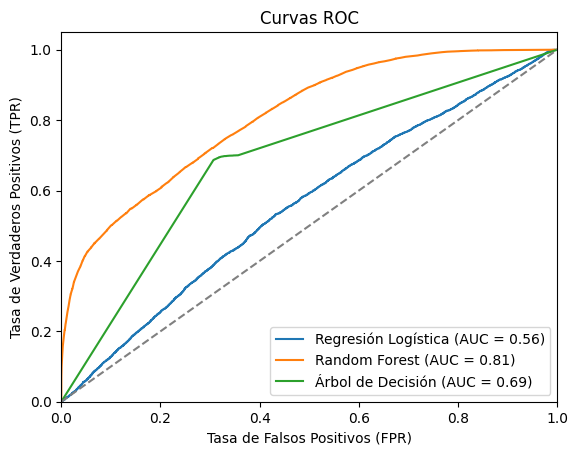

In [7]:
X = spotify[predictors_simplified] 
y = spotify['popularity_class']  

resultados = entrenar_multiples_modelos_base(X, y)

### predictors_moderate


Entrenando y evaluando: Regresión Logística
Accuracy: 0.5790
Precision: 0.5778
Recall: 0.5790
F1 Score: 0.5741
AUC: 0.6018085492550806
Matriz de Confusión:
[[8117 3813]
 [5769 5061]]

Entrenando y evaluando: Random Forest
Accuracy: 0.7442
Precision: 0.7446
Recall: 0.7442
F1 Score: 0.7443
AUC: 0.8459723657314637
Matriz de Confusión:
[[8887 3043]
 [2780 8050]]

Entrenando y evaluando: Árbol de Decisión
Accuracy: 0.7103
Precision: 0.7104
Recall: 0.7103
F1 Score: 0.7103
AUC: 0.7083781353060598
Matriz de Confusión:
[[8576 3354]
 [3240 7590]]


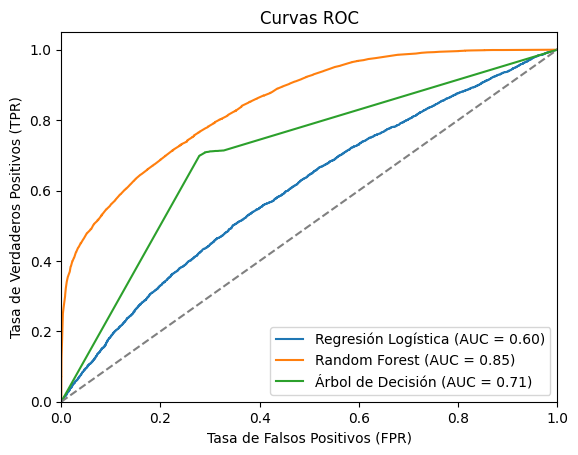

In [8]:
X = spotify[predictors_moderate] 
y = spotify['popularity_class']  

resultados = entrenar_multiples_modelos_base(X, y)

### predictors_complete


Entrenando y evaluando: Regresión Logística
Accuracy: 0.5906
Precision: 0.5895
Recall: 0.5906
F1 Score: 0.5884
AUC: 0.6266712022036828
Matriz de Confusión:
[[7877 4053]
 [5264 5566]]

Entrenando y evaluando: Random Forest
Accuracy: 0.7644
Precision: 0.7649
Recall: 0.7644
F1 Score: 0.7645
AUC: 0.8658736365332089
Matriz de Confusión:
[[9088 2842]
 [2520 8310]]

Entrenando y evaluando: Árbol de Decisión
Accuracy: 0.7180
Precision: 0.7183
Recall: 0.7180
F1 Score: 0.7181
AUC: 0.7163303790424135
Matriz de Confusión:
[[8616 3314]
 [3105 7725]]


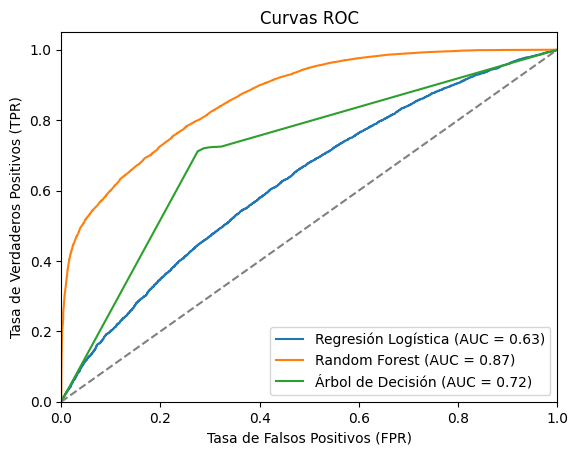

In [9]:
# Ejemplo de uso
# X y y son tus datos (X: características, y: etiquetas)
X = spotify[predictors_complete]  # Tus características
y = spotify['popularity_class']   # Tu etiqueta o variable objetivo

resultados = entrenar_multiples_modelos_base(X, y)

## Hyperparameter - GridSerachCV

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def optimizar_modelo_simple(modelo, param_grid, X, y, test_size, scoring):
    """
    Esta función optimiza los hiperparámetros de un modelo usando GridSearchCV y devuelve el mejor modelo con sus métricas.

    Parámetros:
    - modelo: El modelo a entrenar (por ejemplo, RandomForestClassifier()).
    - param_grid: Un diccionario de hiperparámetros para GridSearchCV.
    - X: Conjunto de características.
    - y: Conjunto de etiquetas (variable objetivo).
    - test_size: Proporción de los datos para el conjunto de prueba (por defecto 0.2).
    - scoring: Métrica a optimizar (por defecto 'accuracy').

    Retorna:
    - mejor_modelo: El modelo con los mejores hiperparámetros.
    - metrics: Un diccionario con las métricas de rendimiento (accuracy, precision, recall, f1 score).
    """

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Crear GridSearchCV
    grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=scoring, n_jobs=-1)

    # Entrenar con los datos de entrenamiento
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    mejor_modelo = grid_search.best_estimator_

    # Predecir en el conjunto de prueba
    y_pred = mejor_modelo.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Crear un diccionario con las métricas
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Mostrar resultados
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Matriz de Confusión:")
    print(metrics['confusion_matrix'])

    return mejor_modelo, metrics

### Train Hyperparameter

In [11]:
# Ejemplo de uso:
# Parámetros para optimizar en RandomForest
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Supongamos que ya tienes tus características (X) y tu variable objetivo (y)
X = spotify[predictors_complete]  # Tus características -- predictors_complete
y = spotify['popularity_class']   # Tu variable objetivo

# Llamar a la función para optimizar el modelo
mejor_modelo_rf, metrics_rf = optimizar_modelo_simple(
    RandomForestClassifier(random_state=50),
    param_grid_rf,
    X,
    y,
    test_size=0.2,
    scoring='accuracy'
)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.7657
Precision: 0.7662
Recall: 0.7657
F1 Score: 0.7658
Matriz de Confusión:
[[9101 2829]
 [2504 8326]]


## SMOTE with Hyperparameter

In [16]:
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Importar el pipeline de imbalanced-learn

def optimizar_modelo_smote(modelo, param_grid, X, y, ruta_modelo, test_size=0.2, scoring='accuracy'):
    """
    Esta función optimiza los hiperparámetros de un modelo usando GridSearchCV y SMOTE,
    devolviendo el mejor modelo con sus métricas y lo guarda en un archivo.

    Parámetros:
    - modelo: El modelo a entrenar (por ejemplo, RandomForestClassifier()).
    - param_grid: Un diccionario de hiperparámetros para GridSearchCV.
    - X: Conjunto de características.
    - y: Conjunto de etiquetas (variable objetivo).
    - ruta_modelo: Ruta y nombre del archivo donde se guardará el modelo (por defecto 'mejor_modelo.pkl').
    - test_size: Proporción de los datos para el conjunto de prueba (por defecto 0.2).
    - scoring: Métrica a optimizar (por defecto 'accuracy').

    Retorna:
    - mejor_modelo: El modelo con los mejores hiperparámetros.
    - metrics: Un diccionario con las métricas de rendimiento (accuracy, precision, recall, f1 score).
    """

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Crear un pipeline que aplica SMOTE y luego entrena el modelo
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),  # Aplicar SMOTE al conjunto de entrenamiento
        ('modelo', modelo)  # El modelo que se optimizará
    ])

    # Crear GridSearchCV sobre el pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, n_jobs=-1)

    # Entrenar con los datos de entrenamiento
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo
    mejor_modelo = grid_search.best_estimator_

    # Predecir en el conjunto de prueba
    y_pred = mejor_modelo.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Crear un diccionario con las métricas
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Mostrar resultados
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Matriz de Confusión:")
    print(metrics['confusion_matrix'])

    # Guardar el modelo siempre
    try:
        joblib.dump(mejor_modelo, ruta_modelo)
        print(f"Modelo guardado en: {ruta_modelo}")
    except Exception as e:
        print(f"Error al guardar el modelo: {e}")

    return mejor_modelo, metrics


### Train SMOTE with Hyperparameter 

In [13]:
# Supongamos que ya tienes X, y, y los hiperparámetros

# Definir el modelo
#modelo = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
#param_grid 

# Llamar a la función para optimizar y guardar el modelo
mejor_modelo, metrics = optimizar_modelo_smote(
    modelo = RandomForestClassifier(random_state=42), 
    param_grid = {
    'modelo__n_estimators': [100, 150],
    'modelo__max_depth': [None, 10],
    'modelo__min_samples_split': [2, 5],
    'modelo__min_samples_leaf': [1, 2]
    },
    X = X, 
    y = y, 
    ruta_modelo='../data/06_models/modelo_random_forest.pkl'
)


Mejores hiperparámetros: {'modelo__max_depth': None, 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 150}
Accuracy: 0.7620
Precision: 0.7641
Recall: 0.7620
F1 Score: 0.7621
Matriz de Confusión:
[[8825 3105]
 [2312 8518]]
Modelo guardado en: ../data/06_models/modelo_random_forest.pkl


## Modelo Random Forest

In [18]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Definir características (predictors_complete) y el target (popularity_class)
X = spotify[predictors_complete]  # Tus características
y = spotify['popularity_class']   # Tu etiqueta o variable objetivo

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo (RandomForestClassifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Definir la ruta para guardar el modelo
ruta_modelo = '../data/06_models/modelo_random_forest_simple.pkl'

# Guardar el modelo entrenado
joblib.dump(rf, ruta_modelo)
print(f"Modelo guardado como {ruta_modelo}")


Modelo guardado como ../data/06_models/modelo_random_forest_simple.pkl


### Metricas modelo_random_forest_simple

Modelo cargado correctamente
Accuracy: 0.7556
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     18007
           1       0.73      0.76      0.75     16133

    accuracy                           0.76     34140
   macro avg       0.76      0.76      0.76     34140
weighted avg       0.76      0.76      0.76     34140

ROC-AUC: 0.8548


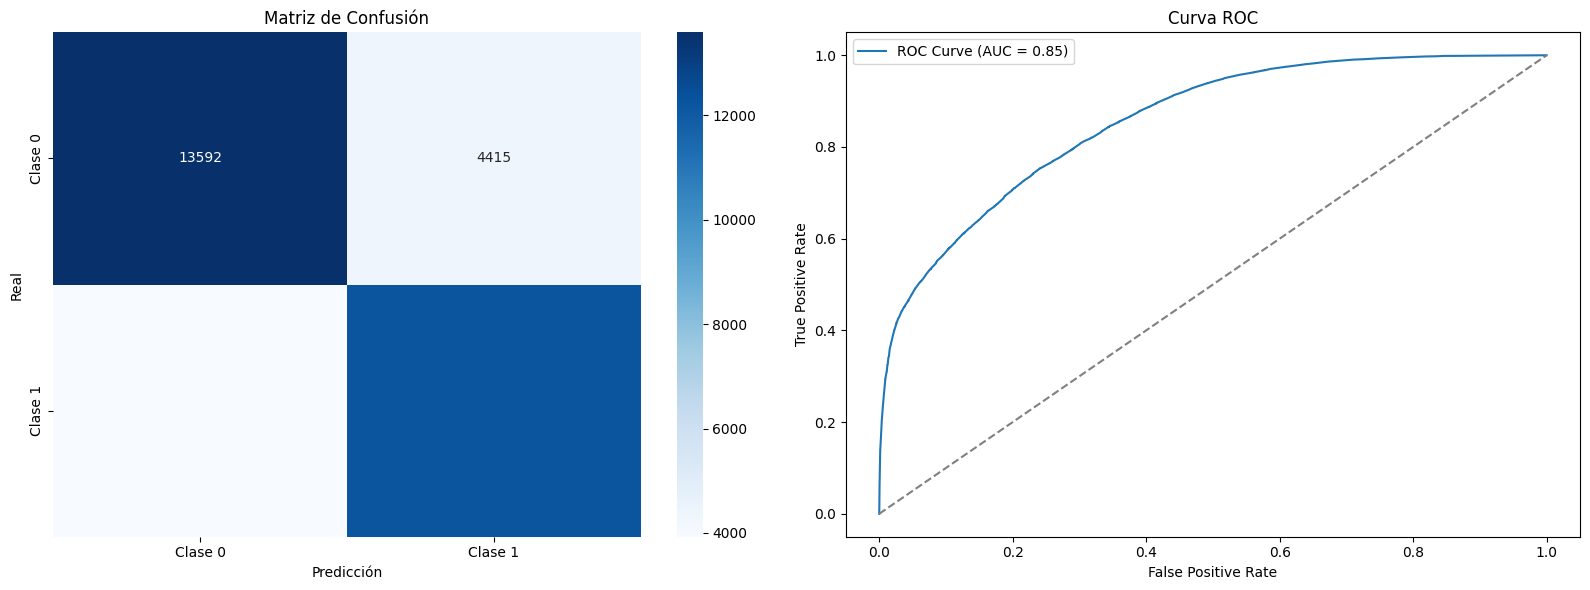

In [21]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el modelo guardado
rf = joblib.load('../data/06_models/modelo_random_forest_simple.pkl')
print("Modelo cargado correctamente")

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# 1. Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# 4. ROC-AUC (Para clasificación binaria)
if len(set(y_test)) == 2:
    y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Obtener los valores de la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Crear subplots para mostrar la matriz de confusión y la curva ROC juntas
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Matriz de Confusión
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], ax=ax[0])
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Real')
    ax[0].set_title('Matriz de Confusión')

    # Subplot 2: Curva ROC
    ax[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Curva ROC')
    ax[1].legend(loc='best')

    # Mostrar ambos gráficos
    plt.tight_layout()
    plt.show()


## CROOS VALIDATION

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def evaluar_modelo(modelo, X, y, metricas=['accuracy', 'precision', 'recall', 'roc_auc'], cv_folds=5):
    """
    Función que toma un modelo, características (X), target (y) y lo evalúa con validación cruzada.
    
    Parámetros:
    - modelo: El modelo de machine learning (por ejemplo, RandomForestClassifier()).
    - X: Características de entrada.
    - y: Target o variable objetivo.
    - metricas: Lista de métricas a evaluar (por defecto: 'accuracy', 'precision', 'recall', 'roc_auc').
    - cv_folds: Número de folds para cross-validation (por defecto: 5).
    
    Retorna:
    - Resultados de la validación cruzada: Promedios de métricas y tiempos.
    """
    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Aplicar la validación cruzada
    cv_results = cross_validate(modelo, X_scaled, y, cv=cv_folds, scoring=metricas, return_train_score=True)

    # Mostrar los resultados de las métricas y tiempos
    print("Resultados de la validación cruzada:")
    
    for metrica in metricas:
        print(f"Mean {metrica.capitalize()}: {cv_results[f'test_{metrica}'].mean():.4f}")
    
    print(f"Mean Training Time: {cv_results['fit_time'].mean():.4f} seconds")
    print(f"Mean Prediction Time: {cv_results['score_time'].mean():.4f} seconds")
    
    return cv_results

# Ejemplo de uso
# Definir características y target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Llamar a la función para evaluar el modelo
resultados = evaluar_modelo(rf, X, y)


Resultados de la validación cruzada:
Mean Accuracy: 0.6873
Mean Precision: 0.6538
Mean Recall: 0.7298
Mean Roc_auc: 0.7804
Mean Training Time: 30.9400 seconds
Mean Prediction Time: 0.9807 seconds


In [28]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def evaluar_modelo(modelo, X, y, cv_folds, metricas=['accuracy', 'precision', 'recall', 'roc_auc']):
    """
    Función que toma un modelo, características (X), target (y) y lo evalúa con validación cruzada.
    
    Parámetros:
    - modelo: El modelo de machine learning (por ejemplo, RandomForestClassifier()).
    - X: Características de entrada.
    - y: Target o variable objetivo.
    - metricas: Lista de métricas a evaluar (por defecto: 'accuracy', 'precision', 'recall', 'roc_auc').
    - cv_folds: Número de folds para cross-validation (por defecto: 5).
    
    Retorna:
    - Resultados de la validación cruzada: Promedios de métricas y tiempos.
    """
    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Aplicar la validación cruzada
    cv_results = cross_validate(modelo, X_scaled, y, cv=cv_folds, scoring=metricas, return_train_score=True)

    # Mostrar los resultados de las métricas y tiempos
    print("Resultados de la validación cruzada:")
    
    for metrica in metricas:
        print(f"Mean {metrica.capitalize()}: {cv_results[f'test_{metrica}'].mean():.4f}")
    
    print(f"Mean Training Time: {cv_results['fit_time'].mean():.4f} seconds")
    print(f"Mean Prediction Time: {cv_results['score_time'].mean():.4f} seconds")
    
    return cv_results

# Ejemplo de uso
# Definir características y target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fould a entrenar
cv_folds = 10 # 5 - 10

# Llamar a la función para evaluar el modelo
resultados = evaluar_modelo(rf, X, y, cv_folds)


Resultados de la validación cruzada:
Mean Accuracy: 0.7106
Mean Precision: 0.6829
Mean Recall: 0.7300
Mean Roc_auc: 0.8068
Mean Training Time: 38.7106 seconds
Mean Prediction Time: 0.5727 seconds


### Train cross validation

In [ ]:
# Ejemplo de uso
# Definir características y target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fould a entrenar
cv_folds = 10 # 5 - 10

# Llamar a la función para evaluar el modelo
resultados = evaluar_modelo(rf, X, y, cv_folds)


## K-FOLD CROSS VALIDATION

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def realizar_k_fold_cv(modelo, X, y, cv=5, scoring=None):
    """
    Esta función realiza K-Fold Cross-Validation en un modelo dado y devuelve las métricas de cada fold.

    Parámetros:
    - modelo: El modelo a evaluar (por ejemplo, RandomForestClassifier()).
    - X: Conjunto de características.
    - y: Conjunto de etiquetas (variable objetivo).
    - cv: Número de folds para K-Fold Cross-Validation (por defecto es 5).
    - scoring: Un diccionario con las métricas que se desean evaluar (opcional).

    Retorna:
    - resultados: Un diccionario con las métricas promedio obtenidas.
    """
    # Si no se especifica un conjunto de métricas, usamos accuracy, precision, recall y F1 por defecto
    if scoring is None:
        scoring = {
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, average='weinsighted'),
            'recall': make_scorer(recall_score, average='weighted'),
            'f1': make_scorer(f1_score, average='weighted')
        }

    # Realizar validación cruzada con el modelo especificado
    resultados = cross_validate(modelo, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

    # Mostrar las métricas para cada fold
    for i in range(cv):
        print(f"Fold {i + 1}:")
        for metric in scoring.keys():
            print(f"    {metric.capitalize()}: {resultados[f'test_{metric}'][i]:.4f}")
        print()

    # Calcular y mostrar las métricas promedio
    metrics_avg = {metric: resultados[f'test_{metric}'].mean() for metric in scoring}
    
    print("Promedio de métricas:")
    for metric, avg in metrics_avg.items():
        print(f"{metric.capitalize()} promedio: {avg:.4f}")

    return metrics_avg

### Train K-FOLD

In [19]:
import joblib

# Cargar el modelo guardado
modelo_cargado = joblib.load('../data/06_models/modelo_random_forest_simple.pkl')

# Supongamos que ya tienes tus datos X e y definidos
# Llamar a la función de validación cruzada con el modelo cargado
resultados_promedio = realizar_k_fold_cv(modelo_cargado, X, y, cv=10)

Fold 1:
    Accuracy: 0.7236
    Precision: 0.7235
    Recall: 0.7236
    F1: 0.7235

Fold 2:
    Accuracy: 0.6757
    Precision: 0.6770
    Recall: 0.6757
    F1: 0.6760

Fold 3:
    Accuracy: 0.7544
    Precision: 0.7552
    Recall: 0.7544
    F1: 0.7545

Fold 4:
    Accuracy: 0.7188
    Precision: 0.7203
    Recall: 0.7188
    F1: 0.7190

Fold 5:
    Accuracy: 0.7099
    Precision: 0.7130
    Recall: 0.7099
    F1: 0.7100

Fold 6:
    Accuracy: 0.7032
    Precision: 0.7103
    Recall: 0.7032
    F1: 0.7026

Fold 7:
    Accuracy: 0.6873
    Precision: 0.6890
    Recall: 0.6873
    F1: 0.6875

Fold 8:
    Accuracy: 0.7492
    Precision: 0.7492
    Recall: 0.7492
    F1: 0.7492

Fold 9:
    Accuracy: 0.7110
    Precision: 0.7188
    Recall: 0.7110
    F1: 0.7104

Fold 10:
    Accuracy: 0.6724
    Precision: 0.6742
    Recall: 0.6724
    F1: 0.6726

Promedio de métricas:
Accuracy promedio: 0.7105
Precision promedio: 0.7131
Recall promedio: 0.7105
F1 promedio: 0.7105


## STRATIFIED K-FOLD CROSS VALIDATION

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def evaluar_modelo_estratificado(modelo, X, y, cv_folds, metricas=['accuracy', 'precision', 'recall', 'roc_auc']):
    """
    Función que toma un modelo, características (X), target (y) y lo evalúa con validación cruzada estratificada.
    
    Parámetros:
    - modelo: El modelo de machine learning.
    - X: Características de entrada.
    - y: Target o variable objetivo.
    - metricas: Lista de métricas a evaluar (por defecto: 'accuracy', 'precision', 'recall', 'roc_auc').
    - cv_folds: Número de folds para cross-validation (por defecto: 5).
    
    Retorna:
    - Resultados de la validación cruzada estratificada: Promedios de métricas y tiempos.
    """
    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Definir la validación cruzada estratificada
    strat_kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    # Aplicar la validación cruzada estratificada
    cv_results = cross_validate(modelo, X_scaled, y, cv=strat_kfold, scoring=metricas, return_train_score=True)

    # Mostrar los resultados de las métricas y tiempos
    print("Resultados de la validación cruzada estratificada:")
    
    for metrica in metricas:
        print(f"Mean {metrica.capitalize()}: {cv_results[f'test_{metrica}'].mean():.4f}")
    
    print(f"Mean Training Time: {cv_results['fit_time'].mean():.4f} seconds")
    print(f"Mean Prediction Time: {cv_results['score_time'].mean():.4f} seconds")
    
    return cv_results



### Train stratiefied

In [32]:
# Ejemplo de uso con un modelo ya definido
# Definir características y target
X = spotify[predictors_complete]
y = spotify['popularity_class']

# Cargar o usar el modelo ya entrenado o configurado
rf = RandomForestClassifier(n_estimators=100, random_state=42)

cv_folds = 5 # 5 - 10
# Llamar a la función para evaluar el modelo con validación cruzada estratificada
resultados_estratificados = evaluar_modelo_estratificado(rf, X, y, cv_folds)


Resultados de la validación cruzada estratificada:
Mean Accuracy: 0.7644
Mean Precision: 0.7455
Mean Recall: 0.7636
Mean Roc_auc: 0.8628
Mean Training Time: 61.5518 seconds
Mean Prediction Time: 2.0237 seconds
